In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from IPython.display import Image, display

sns.set_theme(style="whitegrid")

In [2]:
data = sns.load_dataset('titanic')

# Random missing values
np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'age'] = np.nan
data['embarked'] = data['embarked'].fillna('Unknown')
data['fare_messy'] = data['fare'].apply(lambda x: x if np.random.random() > 0.05 else np.nan)

print("Loaded Titanic dataset with some missing values.")
data.head()

Loaded Titanic dataset with some missing values.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_messy
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,7.2500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,71.2833
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,7.9250
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,53.1000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,8.0500


survived         0
pclass           0
sex              0
age            252
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
fare_messy      44
dtype: int64


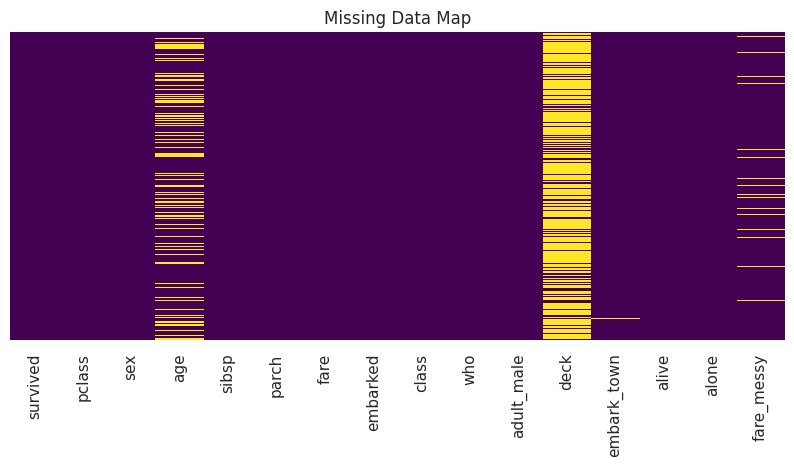

In [3]:
# Count missing values
print(data.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10,4))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Map")
plt.show()

In [4]:
# Pick how to handle missing data: 'median', 'mean', or 'drop'
choice = 'median'  # change to 'mean' or 'drop' to try

if choice in ['median', 'mean']:
    imputer = SimpleImputer(strategy=choice)
    data[['age', 'fare_messy']] = imputer.fit_transform(data[['age', 'fare_messy']])
    print(f"Filled missing values using {choice}.")
elif choice == 'drop':
    data.dropna(subset=['age', 'fare_messy'], inplace=True)
    print("Dropped rows with missing values.")
else:
    print("Invalid choice.")

Filled missing values using median.


In [5]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = ohe.fit_transform(data[['embark_town']])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['embark_town']))
data = pd.concat([data, encoded_df], axis=1)

print("One-Hot Encoding done. Check new columns:")
data.head()

One-Hot Encoding done. Check new columns:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_messy,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,7.2500,0.0,0.0,1.0,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,71.2833,1.0,0.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,7.9250,0.0,0.0,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,53.1000,0.0,0.0,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,8.0500,0.0,0.0,1.0,0.0


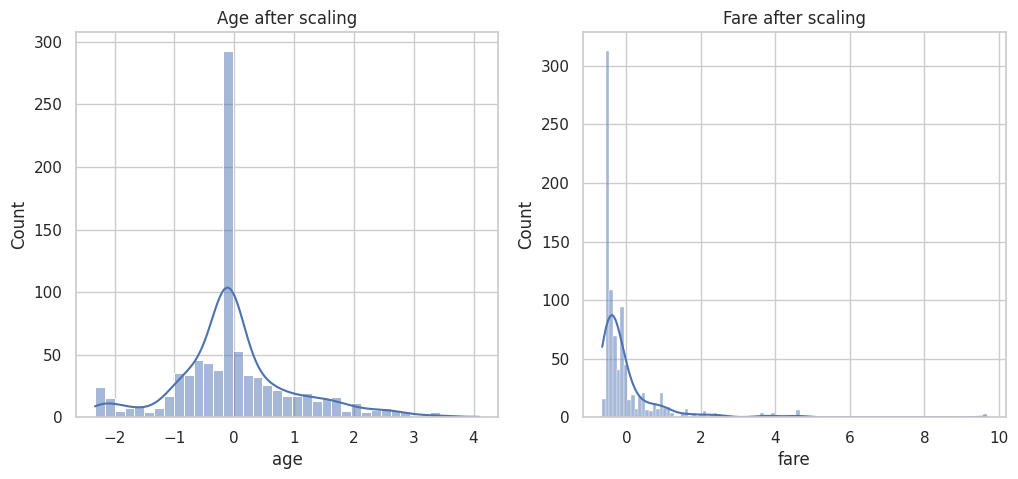

In [6]:
scaler = StandardScaler()
data[['age', 'fare']] = scaler.fit_transform(data[['age', 'fare']])

# Visualize
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data['age'], kde=True).set_title("Age after scaling")
plt.subplot(1,2,2)
sns.histplot(data['fare'], kde=True).set_title("Fare after scaling")
plt.show()

In [7]:
print(f"Missing values in deck: {data['deck'].isnull().sum()}")
data.drop(columns=['deck', 'who'], inplace=True)
print("Dropped 'deck' and 'who'.")
data.head()

Missing values in deck: 688
Dropped 'deck' and 'who'.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alive,alone,fare_messy,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan
0,0,3,male,-0.585698,1,0,-0.502445,S,Third,True,Southampton,no,False,7.2500,0.0,0.0,1.0,0.0
1,1,1,female,0.705893,1,0,0.786845,C,First,False,Cherbourg,yes,False,71.2833,1.0,0.0,0.0,0.0
2,1,3,female,-0.262800,0,0,-0.488854,S,Third,False,Southampton,yes,True,7.9250,0.0,0.0,1.0,0.0
3,1,1,female,0.463720,1,0,0.420730,S,First,False,Southampton,yes,False,53.1000,0.0,0.0,1.0,0.0
4,0,3,male,0.463720,0,0,-0.486337,S,Third,True,Southampton,no,True,8.0500,0.0,0.0,1.0,0.0


In [8]:
# Check the dataset after cleaning
print(data.info())

# Quick stats
data[['age', 'fare', 'fare_messy']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   survived                 891 non-null    int64   
 1   pclass                   891 non-null    int64   
 2   sex                      891 non-null    object  
 3   age                      891 non-null    float64 
 4   sibsp                    891 non-null    int64   
 5   parch                    891 non-null    int64   
 6   fare                     891 non-null    float64 
 7   embarked                 891 non-null    object  
 8   class                    891 non-null    category
 9   adult_male               891 non-null    bool    
 10  embark_town              889 non-null    object  
 11  alive                    891 non-null    object  
 12  alone                    891 non-null    bool    
 13  fare_messy               891 non-null    float64 
 14  embark_tow

,age,fare,fare_messy
count,8.910000e+02,8.910000e+02,891.000000
mean,1.714553e-16,3.987333e-18,31.710813
std,1.000562e+00,1.000562e+00,49.626159
min,-2.327731e+00,-6.484217e-01,0.000000
25%,-4.242491e-01,-4.891482e-01,7.925000
50%,-1.013513e-01,-3.573909e-01,14.454200
75%,3.829954e-01,-2.424635e-02,30.000000
max,4.096320e+00,9.667167e+00,512.329200


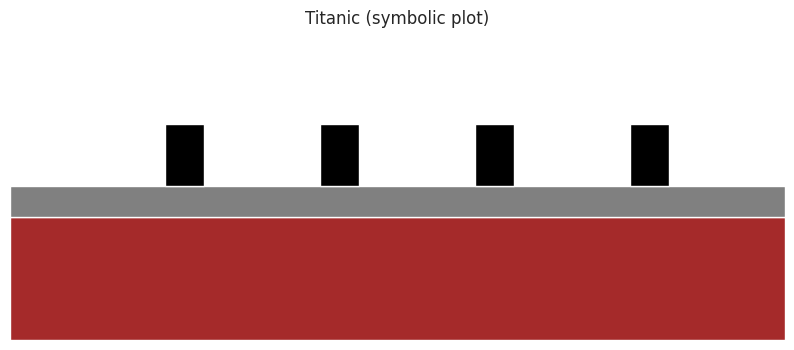

In [9]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10,4))

# Hull
hull = patches.Rectangle((0,0), width=10, height=2, facecolor='brown')
ax.add_patch(hull)

# Deck
deck = patches.Rectangle((0,2), width=10, height=0.5, facecolor='grey')
ax.add_patch(deck)

# Chimneys
for x in [2,4,6,8]:
    chimney = patches.Rectangle((x,2.5), width=0.5, height=1, facecolor='black')
    ax.add_patch(chimney)

ax.set_xlim(0,10)
ax.set_ylim(0,5)
ax.axis('off')
plt.title("Titanic (symbolic plot)")
plt.show()

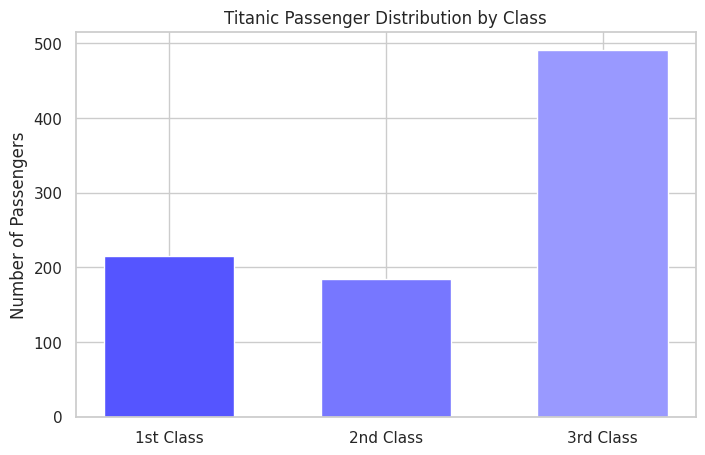

In [10]:
import matplotlib.pyplot as plt

# Count passengers by class
class_counts = data['pclass'].value_counts().sort_index()

# Plot a symbolic "ship" using stacked bars
plt.figure(figsize=(8,5))
colors = ['#5555ff', '#7777ff', '#9999ff']  # darker = lower class
plt.bar(class_counts.index, class_counts.values, color=colors, width=0.6)
plt.xticks([1,2,3], ['1st Class', '2nd Class', '3rd Class'])
plt.ylabel("Number of Passengers")
plt.title("Titanic Passenger Distribution by Class")
plt.show()